# Facial emotion detection employs deep Convolutional Neural Networks (ConvNets) through TensorFlow/Keras, involving fine-tuning of a pre-trained architecture to accurately classify emotions from facial expressions.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import keras, os
from keras.layers import BatchNormalization
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.legacy import Adam

In [2]:
read_image_train = cv2.imread(r'C:\Users\Ammad Jabbar\Downloads\Compressed\computervision\ammad\Dataset\train\fear\5711953.png')
read_image_train.shape

(48, 48, 3)

In [3]:
img_width, img_height = 48, 48
batch_size = 64

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    fill_mode='nearest'
)

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\Ammad Jabbar\\Downloads\\Compressed\\computervision\\ammad\\Dataset\\train'
,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True  # Use shuffle for training data
)

Found 32298 images belonging to 7 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    'C:\\Users\\Ammad Jabbar\\Downloads\\Compressed\\computervision\\ammad\\Dataset\\test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True  # Use shuffle for validation data
)

Found 3589 images belonging to 7 classes.


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))

model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0

In [10]:
model.compile(
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
num_train_samples = len(train_generator.filenames)
steps_per_epoch = num_train_samples // batch_size

epochs = 50

train_model = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/50
504/504 [==============================] - 326s 644ms/step - loss: 1.8033 - accuracy: 0.2510 - val_loss: 1.7578 - val_accuracy: 0.2951
Epoch 2/50
504/504 [==============================] - 148s 294ms/step - loss: 1.7340 - accuracy: 0.2948 - val_loss: 1.6534 - val_accuracy: 0.3341
Epoch 3/50
504/504 [==============================] - 148s 294ms/step - loss: 1.6809 - accuracy: 0.3266 - val_loss: 1.5826 - val_accuracy: 0.3901
Epoch 4/50
504/504 [==============================] - 148s 293ms/step - loss: 1.6391 - accuracy: 0.3565 - val_loss: 1.5283 - val_accuracy: 0.4015
Epoch 5/50
504/504 [==============================] - 154s 305ms/step - loss: 1.6023 - accuracy: 0.3762 - val_loss: 1.5217 - val_accuracy: 0.4202
Epoch 6/50
504/504 [==============================] - 153s 304ms/step - loss: 1.5636 - accuracy: 0.3932 - val_loss: 1.4424 - val_accuracy: 0.4617
Epoch 7/50
504/504 [==============================] - 156s 309ms/step - loss: 1.5327 - accuracy: 0.4085 - val_loss: 1.4110 -

In [13]:
test_loss, test_acc =model.evaluate(validation_generator, verbose=2)

print('\nTest accuracy:', test_acc)

model.save('detection_emotions_model_50epochs.keras')


57/57 - 3s - loss: 1.0712 - accuracy: 0.5954 - 3s/epoch - 59ms/step

Test accuracy: 0.5954304933547974


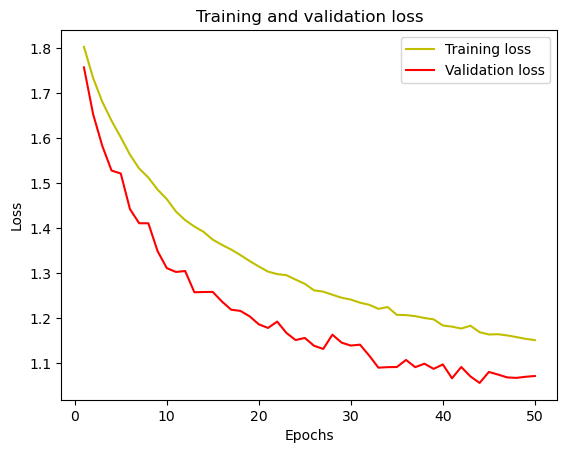

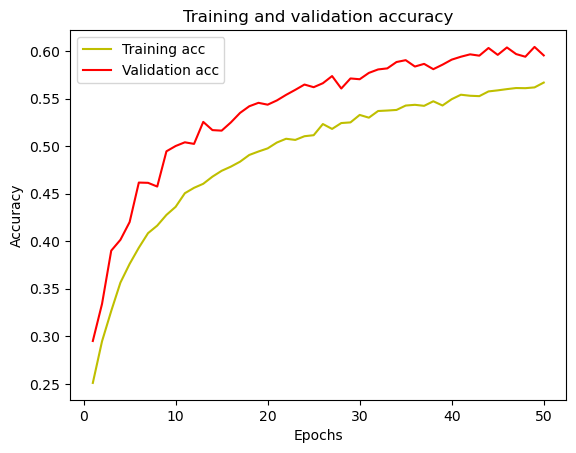

In [14]:
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = train_model.history['accuracy']

val_acc = train_model.history['val_accuracy']


plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from keras.models import load_model

my_model = load_model('detection_emotions_model_50epochs.keras', compile=False)


test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

2/2 [==============================] - 0s 46ms/step


Accuracy =  0.609375


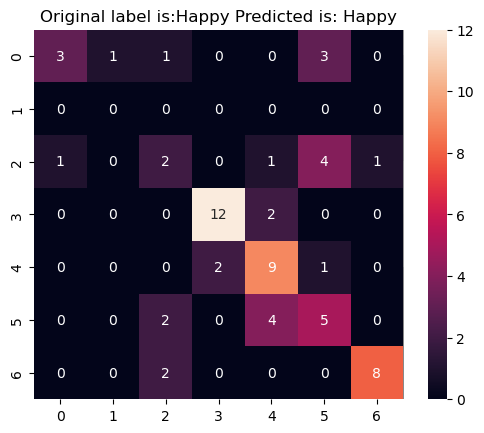

In [16]:
from sklearn import metrics
import seaborn as sns
import random
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)

import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

n=random.randint(0, test_img.shape[1] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [ ]:
model_json=model.to_json()
with open("model_emotions.json","w")as json_file:
  json_file.write(model_json)